## Problem 3. Zipf의 법칙을 확인할 수 있는 python 코드를 작성하시오.

### 3-1. 주어진 텍스트(bible.txt)로부터 각 단어의 등장 빈도를 count하여 Zipf의 법칙이 성립하는지 확인할 수 있는 python 코드를 작성하시오. 결과로 Zipf의 법칙을 보여줄 수 있는 결과를 출력하시오.

bible.txt의 크기가 매우 크므로, 비교적 작은 테스트 케이스를 만들어서 테스트하는 식으로 문제를 풀었습니다.

우선 문제 3에서 사용할 모듈들을 임포트합니다.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

우선 각 단어의 등장횟수를 세는 함수 `count_words`를 정의합니다. `count_words` 함수는 `numpy` 모듈의 `unique`함수를 이용해서 unique한 단어의 개수를 셉니다.

In [2]:
def count_words(words: list) -> dict:
    word_unique, word_count = np.unique(np.array(words), return_counts=True)
    return dict(zip(word_unique, word_count))

In [3]:
example1 = ['the', 'a', 'some', 'a', 'some', 'the', 'abc', '123', 'the']
print(count_words(example1))

{'abc': 1, 'a': 2, 'the': 3, 'some': 2, '123': 1}


그리고 각 단어별 등장횟수로 단어를 정렬하는 함수 `sort_words_by_frequency`를 정의합니다. 정렬을 기본 함수인 `sorted`를 이용해서 하고, 정렬된 list에서 키값만 뽑아내기 위해서 `map` 함수를 사용했습니다.

In [4]:
def sort_words_by_frequency(word_count_dict: list) -> list:
    word_rank_pair_list = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)
    return list(map(lambda x: x[0], word_rank_pair_list))

In [5]:
example2 = {'123': 1, 'a': 2, 'abc': 1, 'some': 2, 'the': 3}
print(sort_words_by_frequency(example2))

['the', 'a', 'some', 'abc', '123']


`calculate_freq_and_rank_of_words` 함수는 주어진 단어들의 `freq_list`와 `rank_list`를 계산하여 리턴합니다. `word_count_dict`를 순회하면서 freq를 체크하는 식으로 구현하였습니다. 이때 만약 등장횟수가 같은 단어가 여러개 있다면 이들의 rank는 최소값을 사용합니다. 이전 단어의 등장횟수와 현재 단어의 등장횟수를 `freq_list[i - 1] == freq`로 비교하여 같으면 `rank`를 그대로 유지하는 방법으로 rank가 최소값이 되도록 했습니다.

In [6]:
def calculate_freq_and_rank_of_words(word_rank_list: list, word_count_dict: dict) -> (list, list):
    freq_list = []
    rank_list = []

    rank = 1 # 현재 rank 값.
    for i in range(len(word_count_dict)):
        word = word_rank_list[i]
        freq = word_count_dict[word]
        # freq가 같은 경우 rank도 같아야 하지만 현재 word_rank_list의 index는 1씩 증가하며 모두 다른 값을 가지므로
        # 바로 rank = i + 1을 적용할 수 없음
        # 만약 이전 rank의 단어가 현재 단어와 동일한 freq를 같는다면, 이전 rank를 그대로 유지한다.
        if i > 0 and freq_list[i - 1] == freq:
            pass
        else:
            rank = i + 1

        freq_list.append(freq)
        rank_list.append(rank)
        
    return (freq_list, rank_list)

In [7]:
example3 = ['the', 'a', 'some', 'a', 'some', 'the', 'abc', '123', 'the']
example3_word_count_dict = count_words(example3)
example3_word_rank_list = sort_words_by_frequency(example3_word_count_dict)
print(example3_word_rank_list)
print(calculate_freq_and_rank_of_words(example3_word_rank_list, example3_word_count_dict))

['the', 'a', 'some', 'abc', '123']
([3, 2, 2, 1, 1], [1, 2, 2, 4, 4])


Zipf's law는 input으로 word의 리스트를 받아서, `freq_list`와 `rank_list`를 리턴하는 함수이므로 아래와 같이 구성할 수 있습니다.

In [8]:
def zipf_law(words: list) -> (list, list):
    word_count_dict = count_words(words)
    word_rank_list = sort_words_by_frequency(word_count_dict)
    return calculate_freq_and_rank_of_words(word_rank_list, word_count_dict)

In [9]:
example4 = ['the', 'a', 'some', 'a', 'some', 'the', 'abc', '123', 'the']
print(zipf_law(example4))

([3, 2, 2, 1, 1], [1, 2, 2, 4, 4])


`zipf_law`를 적용할 데이터셋을 준비합니다. `bible.txt`를 읽어서 문장부호 등을 제거한 후 `nltk` 모듈의 `word_tokenizer`를 사용해서 tokenize합니다.

In [10]:
with open("../assets/bible.txt", 'r') as f:
    text = f.read()
s_list = ['.', ',', '?', '!', ';', ':', '\'s', '(', ')', '“', '”', '’', '=', '>',
          '+', '<', '&', '#', '·', '&', '←']
for c in s_list:
    text = text.replace(c, '')
# 소문자로 변환
text = text.lower()
tokenized_words = word_tokenize(text)           # 다른 tokenizer 사용 가능
print(tokenized_words[:20])

['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness']


준비된 데이터셋 `tokenized_words`에 `zipf_law` 함수를 적용하여, 각 단어별 rank와 freq를 얻습니다.

In [11]:
freq_list, rank_list = zipf_law(tokenized_words)
print(freq_list[:20])

[61680, 49862, 33195, 13031, 12561, 12211, 9939, 9733, 8820, 8808, 8712, 8141, 7997, 7670, 7141, 6931, 6879, 6607, 6388, 6257]


이것을 `numpy` 모듈의 `log` 함수를 이용하여, log scale로 변환한 후 플롯팅을 해줍니다.

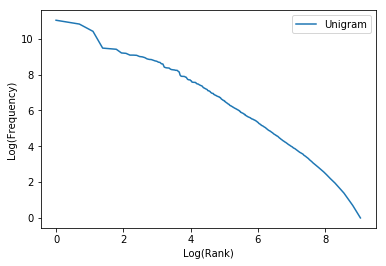

In [12]:
freq_list, rank_list = zipf_law(tokenized_words)
log_rank_list = np.log(rank_list)
log_freq_list = np.log(freq_list)
plt.plot(log_rank_list, log_freq_list, label='Unigram')

plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.legend()
plt.show()

Zipf's law는 모든 단어의 빈도는 해당 단어의 순위에 반비례한다는 규칙입니다. Zipf's law는 빈도를 f, 순위를 r이라고 하면 r X f = k 로 쓸 수 있습니다. 각 항에 로그를 취해서 log(r X f) = log(r) + log(f) = log(k) = k'로 변형할 수 있습니다.
따라서 Zipf's law에 따르면 빈도와 순위에 log를 취해서 플롯팅을 하면 음의 기울기의 선형함수가 나타날 것이라고 예측할 수 있습니다.

실제 결과도 위에서 볼 수 있듯이 그래프가 음의 기울기의 선형함수에 피팅되는 것으로 보입니다. 다만, rank가 매우 작을 때와 매우 클 때 선형추세에서 벗어나는 것을 확인할 수 있습니다.

### 3-2. NLTK에서 제공하는 Bigram, Trigram을 이용하여 Zipf의 법칙이 성립하는지 확인해보고 3-1의 결과(Unigram), Bigram, Trigram 의 결과를 차트를 통해 비교하시오. (print 결과 출력 X)

bigram과 trigram은 `nltk` 모듈의 `bigram` 함수와 `trigram` 함수를 이용해서 아래와 같이 얻을 수 있습니다. 주의할 점은 `bigram` 함수와 `trigram` 함수가 리턴하는 값은 `tuple`이므로 `join`을 해서 `string`으로 변경을 해야한다는 점입니다.

In [13]:
bigram_list = list(map(lambda x: ' '.join(x), nltk.bigrams(tokenized_words)))
trigram_list = list(map(lambda x: ' '.join(x), nltk.trigrams(tokenized_words)))
print(bigram_list[:20])
print(trigram_list[:20])

['in the', 'the beginning', 'beginning god', 'god created', 'created the', 'the heaven', 'heaven and', 'and the', 'the earth', 'earth and', 'and the', 'the earth', 'earth was', 'was without', 'without form', 'form and', 'and void', 'void and', 'and darkness', 'darkness was']
['in the beginning', 'the beginning god', 'beginning god created', 'god created the', 'created the heaven', 'the heaven and', 'heaven and the', 'and the earth', 'the earth and', 'earth and the', 'and the earth', 'the earth was', 'earth was without', 'was without form', 'without form and', 'form and void', 'and void and', 'void and darkness', 'and darkness was', 'darkness was upon']


얻어진 bigram과 trigram도 위에서 unigram을 플롯팅한 것과 동일하게 log scale로 변환해서 플롯팅을 해줍니다.

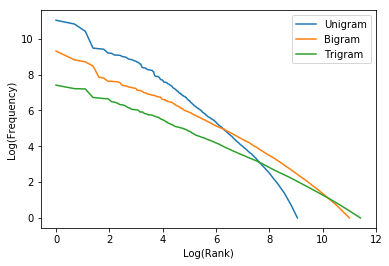

In [14]:
plt.plot(np.log(rank_list), np.log(freq_list), label='Unigram')
bigram_freq_list, bigram_rank_list = zipf_law(bigram_list)
plt.plot(np.log(bigram_rank_list), np.log(bigram_freq_list), label='Bigram')
trigram_freq_list, trigram_rank_list = zipf_law(trigram_list)
plt.plot(np.log(trigram_rank_list), np.log(trigram_freq_list), label='Trigram')

plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.legend()
plt.show()

플롯팅 결과 unigram보다 bigram이, bigram보다 trigram이 더 선형에 가까워집니다. 따라서 trigram이 제일 zipf의 법칙을 잘 나타내는 것으로 보입니다.